# Reproducing figures for the manuscript

Gkanias, E., McCurdy, L. Y., Nitabach, M. N., & Webb, B. (2021). Incentive circuit: how flies
acquire, forget and assimilate memories. Submitted to eLife.

In [1]:
%cd -q ../src

from incentive.circuit import IncentiveCircuit
from incentive.results import run_custom_routine, run_main_experiments
from incentive.routines import rewarding_routine, shock_routine
from incentive.arena import load_arena_paths, load_arena_stats
from incentive.plot import *

import warnings
import os

# the directory of the file
__dir__ = os.path.dirname(os.path.abspath(""))

warnings.filterwarnings('ignore')

## The dopaminergic learning rule

The update of the synaptic weights is based on 3 parameters: the dopaminegic factor, $\mathbf{D}(t)$,
the KC responses, $\mathbf{k}(t)$, and the KC-MBON synaptic weights before the update, $\mathbf{W}_{k2m}(t)$, and is given by:

$$\tau \frac{d\mathbf{W}_{k2m}}{dt} = \mathbf{D}(t+1) * [\mathbf{k}^T(t) + \mathbf{W}_{k2m}(t) - w_\text{rest}]$$

where the dopaminergic factor is caclulated as:

$$\mathbf{D}(t + 1) = \mathbf{d}^T_+(t+1) \cdot \mathbf{W}_{d3km}$$

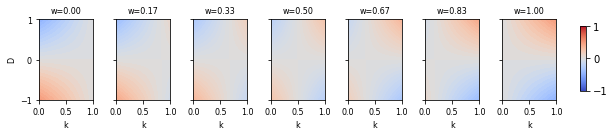

In [2]:
%matplotlib inline

plot_learning_rule(wrt_k=False, wrt_d=False, colour_bar=True, figsize=(9, 2))

**Figure 2.** Relation among the variables of the dopaminergic learning rule. On the horizontal axis,
we have the response rate of the KC, $\mathbf{k}_i(t) \in [0, 1]$, and on the vertical
axis is the dopaminergic factor, $\mathbf{D}_j(t) \in [-1, 1]$, which controls the
effect of the learning rule: converging (when $\mathbf{D}_j(t) < 0$) or exploding (when
$\mathbf{D}_j(t) > 0$). The different panels correspond to the different synaptic strength
$\mathbf{W}_{k2m}(t) \in [0, 1]$. The colour of the contour shows the change rate of the
synaptic weights, $\tau\frac{d\mathbf{W}_{k2m}}{dt}$, based on values of the other
variables.

## Examples from the mushroom body sub-circuits

Below we reconstruct the exaple responses of the different sub-circuits presented in the manuscript.
These are for the attraction-discharging *Susceptible Memory* (SM), the avoidance *Restrained Memory* (RM),
the attraction-driving *Long-Term Memory* (LTM), the *Reciprocal Restrained Memories* (RRM), the *Reciprocal
Forgetting Memories* (RFM) and the attraction-assimilating *Memory Assimilation Mechanism* (MAM).

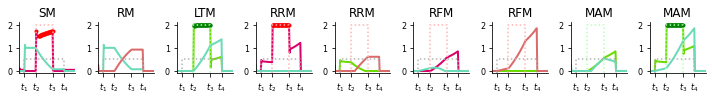

In [3]:
# Susceptible Memory Sub-circuit
sm = IncentiveCircuit(learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=24,
                      nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
                      has_sm=True, has_rm=False, has_ltm=False, has_rrm=False, has_rfm=False, has_mam=False,
                      as_subcircuits=True)

# Restrained Memory Sub-circuit
rm = IncentiveCircuit(learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=24,
                      nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
                      has_sm=True, has_rm=True, has_ltm=False, has_rrm=False, has_rfm=False, has_mam=False,
                      as_subcircuits=True)

# Long-Term Memory Sub-circuit
ltm = IncentiveCircuit(learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=24,
                       nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
                       has_sm=True, has_rm=True, has_ltm=True, has_rrm=False, has_rfm=False, has_mam=False,
                       as_subcircuits=True)

# Reciprocal Restrained Memory Sub-circuit
rrm = IncentiveCircuit(learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=24,
                       nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
                       has_sm=True, has_rm=True, has_ltm=True, has_rrm=True, has_rfm=False, has_mam=False,
                       as_subcircuits=True)

# Reciprocal Forgetting Memory Sub-circuit
rfm = IncentiveCircuit(learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=24,
                       nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
                       has_sm=True, has_rm=True, has_ltm=True, has_rrm=True, has_rfm=True, has_mam=True,
                       as_subcircuits=True)

# Memory Assimilation Mechanism
mam = IncentiveCircuit(learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=24,
                       nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
                       has_sm=True, has_rm=True, has_ltm=True, has_rrm=True, has_rfm=True, has_mam=True,
                       as_subcircuits=True)

plot_sm(run_custom_routine(sm, routine=shock_routine), sub=191)
plot_rm(run_custom_routine(rm, routine=shock_routine), sub=192)
plot_ltm(run_custom_routine(ltm, routine=rewarding_routine), sub=193)
plot_rrm(run_custom_routine(rrm, routine=shock_routine), sub=[194, 195])
plot_rfm(run_custom_routine(rfm, routine=shock_routine), sub=[196, 197])
plot_mam(run_custom_routine(mam, routine=rewarding_routine), sub=[198, 199])

**Figure 3 & 4.** Odour (CS) is delivered between $t_1$ and $t_4$ and reinforcement (US)
between $t_2$ and $t_3$ (dotted lines). Coloured lines denote the responses of: reward-encoding DANs (light green),
punishment-encoding DANs (magenta), attraction-driving MBONs (green) and avoidance-encoding MBONs (red).

## The Incentive Circuit (IC)

The **incentive circuit** combines all the identified sub-circuits of the Mushroom Body and reconstruct
similar dynamics to the neural responses of the involved neurons for the aversive olfactory
conditioning experimental paradigm.

### The responses reproduced by the incentive circuit

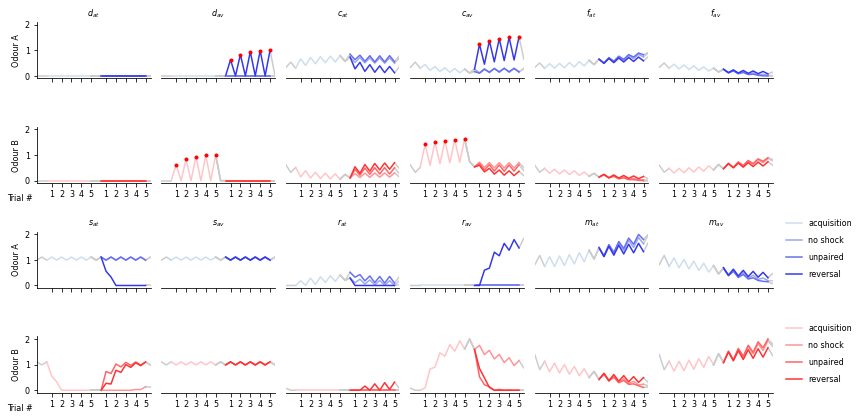

In [4]:
# create the Incentive Complex
model = IncentiveCircuit(
    learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=26,
    nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
    has_sm=True, has_rm=True, has_ltm=True, has_rrm=True, has_rfm=True, has_mam=True)

# run all the experiments and get a copy of the model with the history of their responses and parameters for each
# one of them
scenarios = run_main_experiments(model, reversal=True, unpaired=True, no_shock=True)

# plot the results based on the input flags
plot_phase_overlap_mean_responses(scenarios, only_nids=True, figsize=(12, 6))

**Figure 5.** The responses generated by the incentive circuit for odour A (first and third rows;
lines in blue shades) and odour B (second and firth rows; lines in red shades) during
the “acquisition” followed by “forgetting” phases, i.e. “no shock”, “unpairing” or
“reversal” phases (different shades denote the different phases in Figure 5B). Red dots
denote shock delivery to the appropriate neurons and time-steps. For each trial we
process the odour and shock input in 3 time-steps: (i) no odour and unpaired shock is
delivered (unpaired phase for odour A) or none of them (all other phases), (ii) only
odour is delivered, and (iii) odour and shock are delivered simultaneously (acquisition
phase for odour B and reversal phase for odour A) or only odour (all other phases).
Time-step (i) always produces zero response-rate, so only time-steps (ii) and (iii)
are visualised in order to make the trends obvious and are equivalent to the ‘off-shock’
and ‘on-shock’ values in *Figure 6*.

### The corresponding KC-MBON synaptic weights

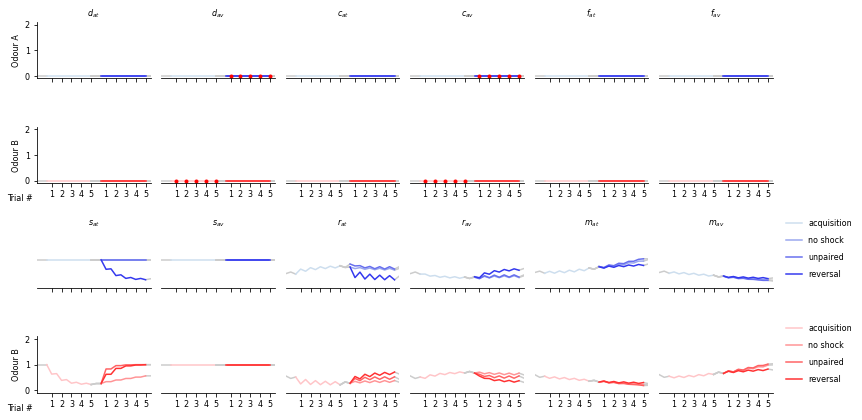

In [5]:
plot_weights(scenarios, only_nids=True, figsize=(12, 6))

**Figure 5 - Figure supplement 1.**

## The incentive circuit of the fruit fly brain

We have collected a data-set from responses of neurons in the fruit fly brain. Here is
a summary of the dataset:

In [6]:
from incentive.imaging import load_data, plot_phase_overlap_mean_responses_from_data

experiment = "B+"

# load the data
df = load_data(experiment)

# generate statistics
nb_neurons, nb_flies, nb_flies_min, nb_flies_max = 0, 0, 14, 0

for name in df[experiment].index:
    nb_flies += df[experiment][name].shape[1]
    nb_neurons += 1
    if nb_flies_min > df[experiment][name].shape[1]:
        nb_flies_min = df[experiment][name].shape[1]
    if nb_flies_max < df[experiment][name].shape[1]:
        nb_flies_max = df[experiment][name].shape[1]

print("#neurons:", nb_neurons)
print("#flies:", nb_flies)
print("min #flies/neuron:", nb_flies_min)
print("max #flies/neuron:", nb_flies_max)
print("mean #flies/neuron:", nb_flies / nb_neurons)

#neurons: 43
#flies: 357
min #flies/neuron: 2
max #flies/neuron: 14
mean #flies/neuron: 8.30232558139535


We also show the responses of selected neurons in the mushroom body that we think that
they have similar trends to the ones of our model.

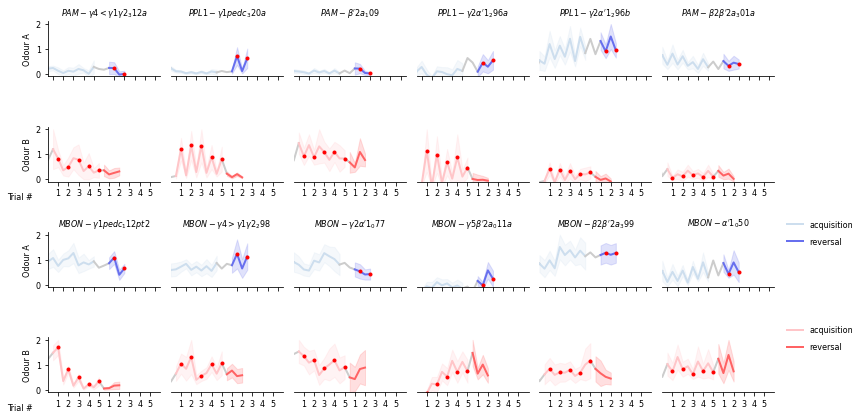

In [7]:
# plot the data from the selected neurons for the TSM model
neurons = [33, 39, 21, 41, 42, 30, 13, 16, 14, 17, 12, 2]
plot_phase_overlap_mean_responses_from_data(df, experiment, nids=neurons, only_nids=True, figsize=(12, 6))


**Figure 6.** Responses of neurons in the Drosophila mushroom body selected to match the
ones in our model. Different panels correspond to different neurons: DANs (top) and
MBONs (bottom). Each panel consists of two rows and one column. Each panel shows the
mean responses of the neuron in odour A (top) and B (bottom) respectively. The responses
are in light and dark shades for the ‘acquisition’ and ‘reversal’ phases only (blue is
for odour A and red for odour B). The red dots show the shock-delivery time-steps for
the directly affected neurons. The solid lines show the mean activity over different
flies and the coloured shades show the standard deviation ($\mu \pm \sigma^2/2$). For
each trial we plot the ‘off-shock’ (only odour) followed by the ‘on-shock’ values
(odour and shock or only odour depending on the condition) resulting in 14 time-steps
in total, as we have data for 5 acquisition and 2 reversal time-steps.

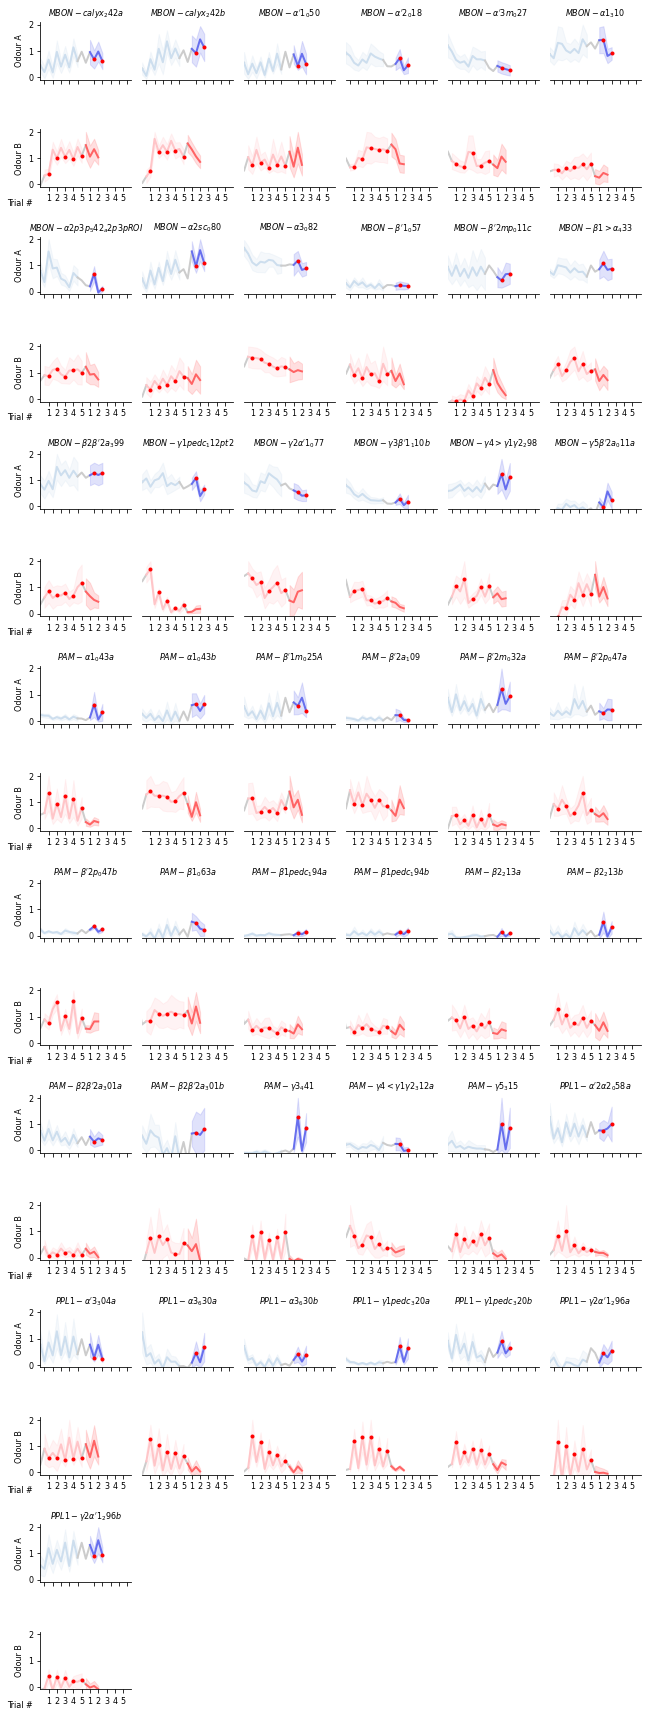

In [8]:
plot_phase_overlap_mean_responses_from_data(df, experiment, only_nids=False, figsize=(9, 24), show_legend=False)

**Figure 6 - Figure supplement 2 & 3.** Responses of all the recorded DANs and MBONs in the mushroom body.

## Simulation of freely-moving fruit flies during olfactory conditioning

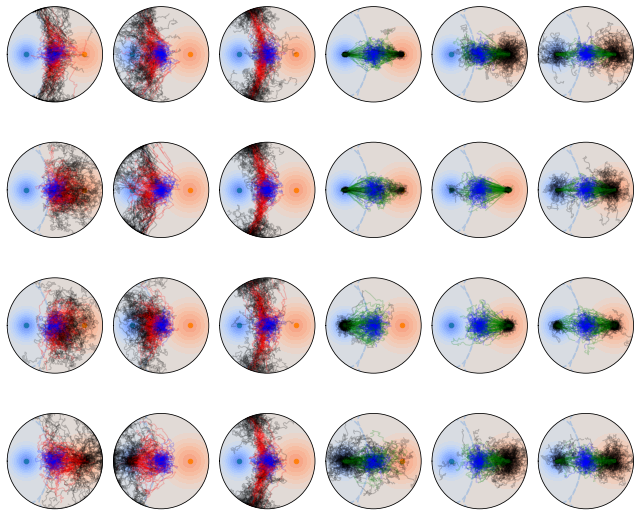

In [9]:
# the directory of the data
arena_dir = os.path.realpath(os.path.join(__dir__, "src", "incentive", "data", "arena"))

data, cases, names = load_arena_paths(file_names=os.listdir(arena_dir), prediction_error=False)
plot_arena_paths(data, cases, names, figsize=(9, 8))

**Figure 7.** The behaviour of the animal controlled by its neurons during the
freely-moving flies paradigm. The animal is exposed to a mixture
of two odours, whose intensity depends on the position of the animal in space. The
distribution of the odours in the area is drawn from Gaussian distributions with
centres at $\mu_A = [−0.6, 0]$ and $\mu_B = [0.6, 0]$, and standard deviation (STD)
$\sigma_A = 0.2$  and $\sigma_B = 0.3$ for odours A (blue) and B (orange) respectively.
Each experiment lasts for 100 sec where: the animal is placed at the centre of the arena
in time-step $t = -20$ sec; during the first 20 sec (pre-training phase, $t \in [-20, 0)$)
the animal is let explore the arena without any reinforcement (blue lines); the next
30 sec (training phase, $t \in [0, 30)$) the animal receives reinforcement (sugar -
green lines; electric shock - red lines) when the intensity of odour A (first and fourth
columns) or odour B (second and fifth columns) is the highest or irrespective of the
odours’ intensity (third and sixth columns); during the last 50 sec (post-training
phase; $t \in [30, 80)$) the animal continues being exposed to the odours without
receiving a reinforcement (black lines). Area shades show the area in which
the reinforcements apply (red for shock and green for sugar).

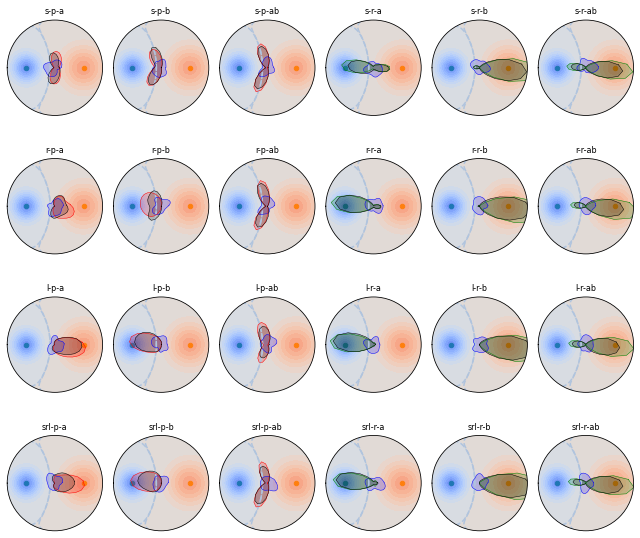

In [10]:
df = load_arena_stats(file_names=os.listdir(arena_dir), prediction_error=False)
plot_arena_stats(df, "arena-stats", figsize=(9, 8))

**Figure 7 - Figure supplement 1.** The von-Mises KDEs of the flies' direction extracted
from the paths.

In order to reproduce all the figures from the manuscript you should use the scripts
in the [examples](../examples) directory.

**Author:** [Evripidis Gkanias](https://evgkanias.github.io/).

Copyright &copy; 2021, Insect Robotics Group, Institute of Perception Action and Behaviour,
School of Informatics, the University of Edinburgh.
